<a href="https://colab.research.google.com/github/bargida/Workshops/blob/main/workshop3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Q1. What are the dimensions of the dataset (number of rows and columns)?

In [4]:
dataset.shape

(891, 12)

Q2. How many males and females exist in the dataset?

In [5]:
dataset['Sex'].value_counts()

,count
Sex,
male,577
female,314


Q3. How many passengers survived in this dataset?

In [6]:
survived = dataset[dataset['Survived']==1].value_counts()
print(survived)

PassengerId  Survived  Pclass  Name                                                      Sex     Age   SibSp  Parch  Ticket    Fare      Cabin            Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)       female  38.0  1      0      PC 17599  71.2833   C85              C           1
691          1         1       Dick, Mr. Albert Adrian                                   male    31.0  1      0      17474     57.0000   B20              S           1
682          1         1       Hassab, Mr. Hammad                                        male    27.0  0      0      PC 17572  76.7292   D49              C           1
680          1         1       Cardeza, Mr. Thomas Drake Martinez                        male    36.0  0      1      PC 17755  512.3292  B51 B53 B55      C           1
648          1         1       Simonius-Blumer, Col. Oberst Alfons                       male    56.0  0      0      13213     35.5000   A26              C          

Q4. What is the class distribution in the dataset?

In [7]:
class_distribution = survived.value_counts()
print(class_distribution)

count
1    123
Name: count, dtype: int64


Let's plot some bar graphs to identify deciding factors. In this section we are going to investigate which feature
or attribute is more discriminating in classifying the target class

In [8]:
def bar_chart(feature):
  survived = dataset[dataset['Survived']==1][feature].value_counts()
  dead = dataset[dataset['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

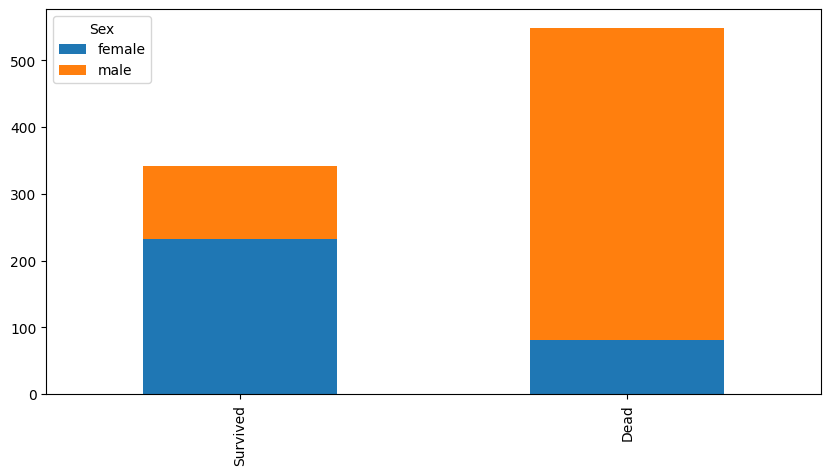

In [9]:
bar_chart('Sex')

5. What conclusion can be drawn from the bar graph shown above.



In [10]:
dataset.Sex[dataset.Survived==1].value_counts()

,count
Sex,
female,233
male,109


In [11]:
dataset.Sex[dataset.Survived==0].value_counts()

,count
Sex,
male,468
female,81


Q6. What is the most defining feature of surviving?

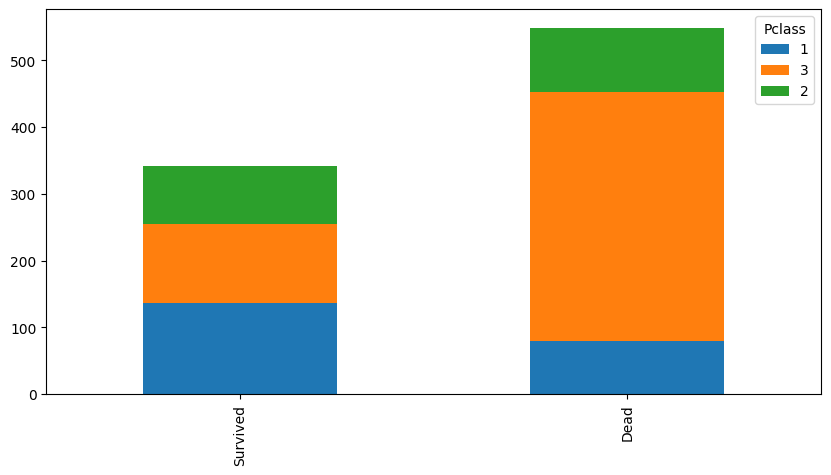

In [12]:
dataset.groupby('Pclass')[['Survived']].value_counts()
bar_chart('Pclass')

Q7. What is the second most defining feature of surviving?

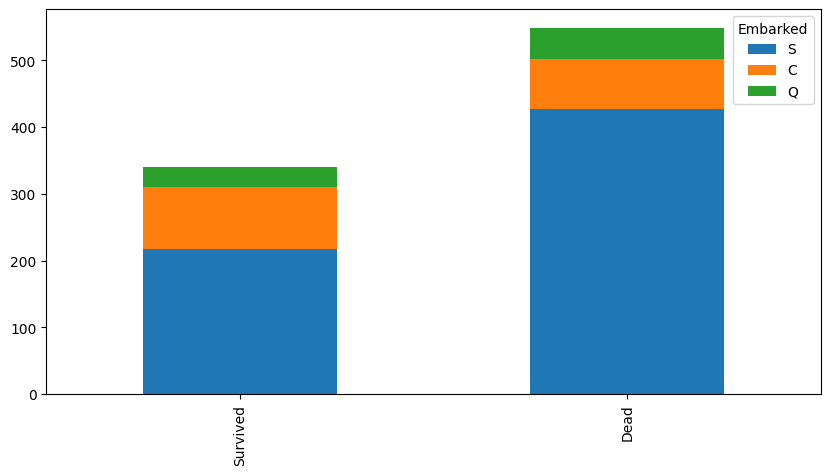

In [13]:
dataset.groupby('Embarked')[['Survived']].value_counts()
bar_chart('Embarked')


Let's first split the dataset in to train and test set.

In [14]:
import numpy as np
dataset["Sex"]=np.where(dataset["Sex"]=="male",0,1)

In [15]:
#dataset['Sex']

In [16]:
dataset.shape

(891, 12)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(dataset, test_size=0.2, random_state=67)

Q8. What is the dimensions of train and test? Are the dimensions of train and test same as dataset and why?

In [19]:
dimension_train = train.shape
dimension_test = test.shape
print(dimension_train)
print(dimension_test)

(712, 12)
(179, 12)


In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
873,874,0,3,"Vander Cruyssen, Mr. Victor",0,47.0,0,0,345765,9.0000,NaN,S
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",1,23.0,0,0,CA. 2314,7.5500,NaN,S
713,714,0,3,"Larsson, Mr. August Viktor",0,29.0,0,0,7545,9.4833,NaN,S
135,136,0,2,"Richard, Mr. Emile",0,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
639,640,0,3,"Thorneycroft, Mr. Percival",0,NaN,1,0,376564,16.1000,NaN,S


In [21]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
695,696,0,2,"Chapman, Mr. Charles Henry",0,52.0,0,0,248731,13.5000,NaN,S
82,83,1,3,"McDermott, Miss. Brigdet Delia",1,NaN,0,0,330932,7.7875,NaN,Q
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",1,51.0,1,0,13502,77.9583,D11,S
27,28,0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.0000,C23 C25 C27,S
844,845,0,3,"Culumovic, Mr. Jeso",0,17.0,0,0,315090,8.6625,NaN,S


First, we'll look at a single feature 'Sex' and the class 'Survived'.

In [22]:
features_drop = ['PassengerId','Pclass', 'Name', 'Age', 'SibSp',
'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
train_selected = train.drop(features_drop, axis=1)
test_selected = test.drop(features_drop, axis=1)

In [23]:
train_selected[:5]


,Survived,Sex
873,0,0
649,1,1
713,0,0
135,0,0
639,0,0


In [24]:
test_selected[:5]

,Survived,Sex
695,0,0
82,1,1
765,1,1
27,0,0
844,0,0


In [25]:
train_data = train_selected.drop('Survived', axis=1)
target = train_selected['Survived']
train_data.shape, target.shape

((712, 1), (712,))

In [26]:
train_data.head()

,Sex
873,0
649,1
713,0
135,0
639,0


In [27]:
target.head()

,Survived
873,0
649,1
713,0
135,0
639,0


In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
model =  gnb.fit(train_data, target)
model

GaussianNB()

In [30]:
test_data = test_selected.drop("Survived", axis=1).copy()

# **Task 1**

In [31]:
prediction = gnb.predict(test_data)

In [32]:
test["prediction"] = prediction

In [33]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test["Survived"], test["prediction"] )

In [34]:
score

0.8324022346368715

In [35]:
matrix = confusion_matrix(test["Survived"], prediction)
print(matrix)

[[91 12]
 [18 58]]


In [36]:
print(classification_report(test["Survived"], prediction))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       103
           1       0.83      0.76      0.79        76

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



In this section we'll analyse classification result with more features.

In [37]:
dataset = pd.read_csv('train.csv')

In [38]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


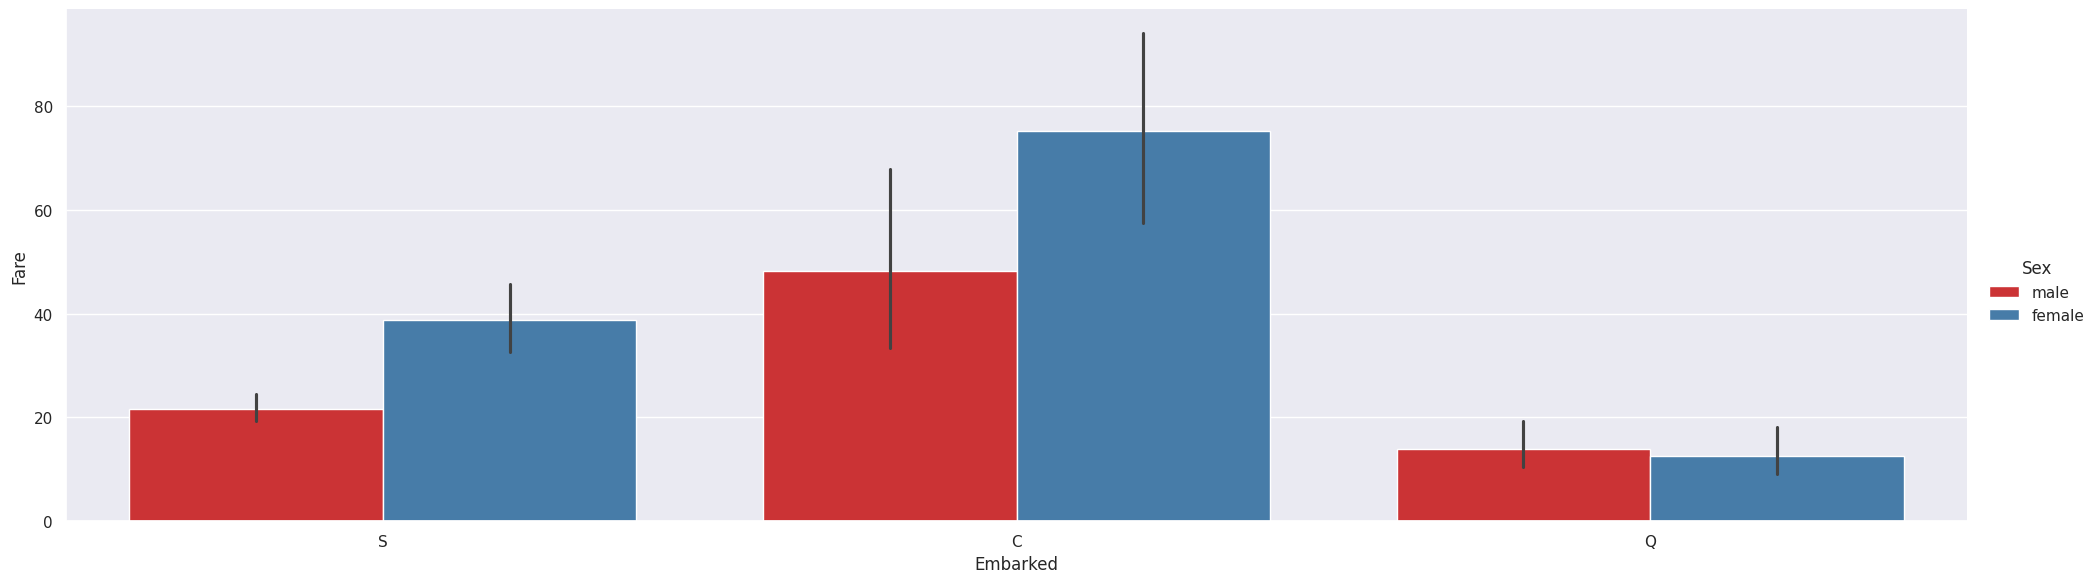

In [39]:
import seaborn as sns

sns.set()


plot = sns.catplot(x="Embarked", y="Fare", hue="Sex", data=dataset,
  palette=('Set1'), kind="bar", height=6, aspect=20/6)

display(dataset[dataset['Embarked'].isnull()])


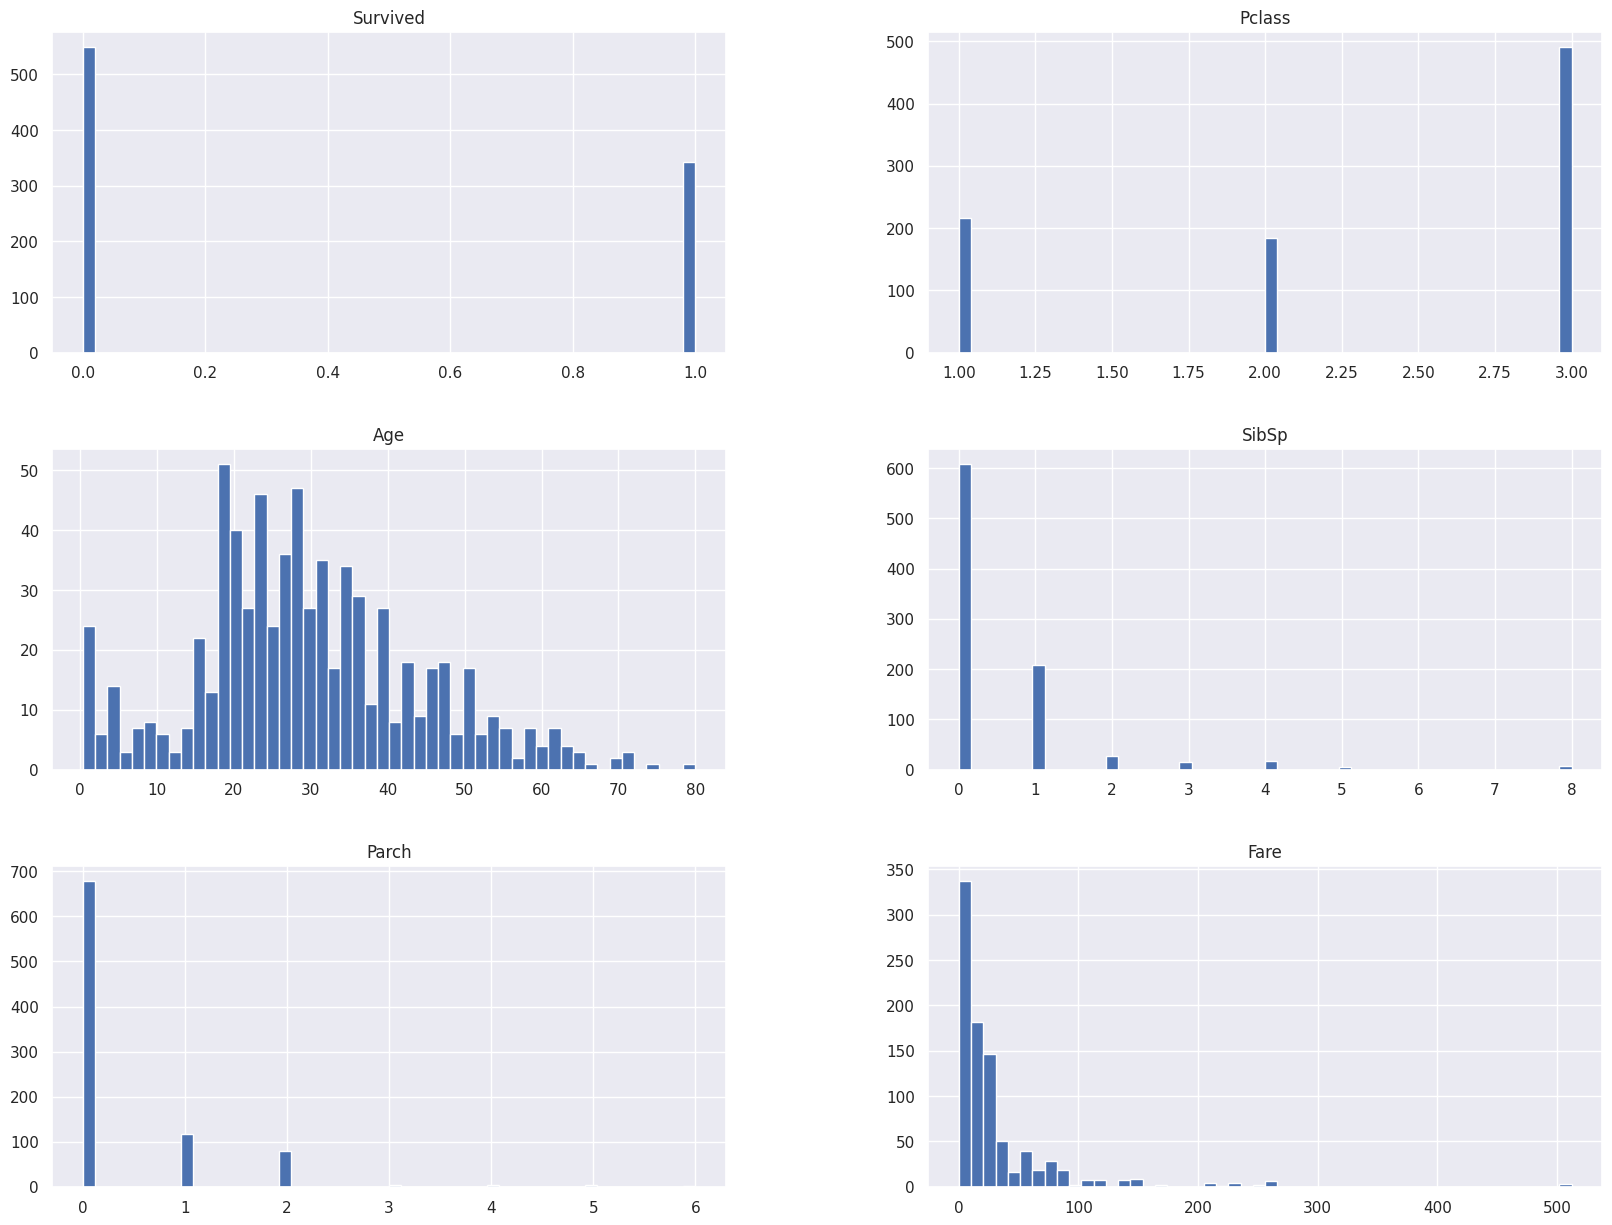

In [42]:
import matplotlib.pyplot as plt
dataset.drop(['PassengerId'], axis=1).hist(bins=50, figsize=(20,15))
plt.show()

In [43]:
dataset[:5]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In this section, we will deal with the missing values.
As we saw before, the two missing values for embarked columns can be replaced by 'C' (Cherbourg). In the cell
below use fillna() function to replace missing values with 'C'

In [44]:
dataset['Embarked'].fillna('C', inplace=True)

We replace missing ages by the mean age of passengers who belong to the same group of class/sex/family

Q9. Display rows where Age is NULL

In [45]:
dataset['Age'] = dataset.groupby(['Pclass','Sex','Parch','SibSp'])['Age'].transform(lambda x: x.fillna(x.mean()))
dataset['Age'] = dataset.groupby(['Pclass','Sex','Parch'])['Age'].transform(lambda x: x.fillna(x.mean()))
dataset['Age'] = dataset.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))


Create a Title column from name column

In [46]:
dataset['Title'] = pd.Series((name.split('.')[0].split(',')[1].strip()
                      for name in dataset['Name']), index=dataset.index)
dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess','Countess',
                  'Capt,' 'Col,'  'Don,' 'Dr,' 'Major,' 'Rev,' 'Sir,' 'Jonkheer,'
                  'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

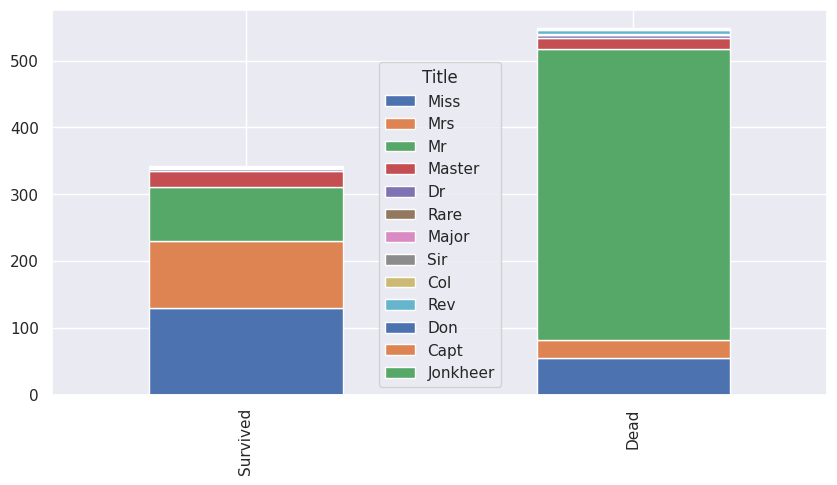

In [47]:
bar_chart('Title')

Transform categorical variables to numeric variables

In [48]:
dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3,
        "Master": 4, "Rare": 5})

In [49]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [50]:
# Create a Family Size, Is Alone, Child columns
dataset['FamillySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset['FamillySize'][dataset['FamillySize'].between(1,5, inclusive='neither')] = 2
dataset['FamillySize'][dataset['FamillySize']>5] = 3
dataset['IsAlone'] = np.where(dataset['FamillySize']!=1, 0, 1)
dataset['IsChild'] = dataset['Age'] < 18
dataset['IsChild'] = dataset['IsChild'].astype(int)

In [51]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamillySize,IsAlone,IsChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,2,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,2,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,1,1,0


In [52]:
dataset.shape

(891, 16)

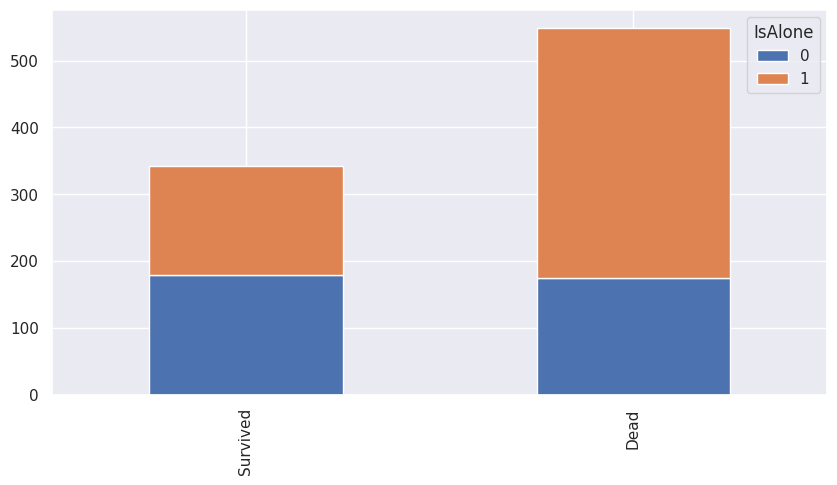

In [53]:
bar_chart('IsAlone')

Modification of cabin column to keep only the letter contained corresponding to the deck of the boat

In [54]:
dataset['Cabin'] = dataset['Cabin'].str[:1]
dataset['Cabin'] = dataset['Cabin'].map({cabin: p for p, cabin in
                                        enumerate(set(cab for cab in dataset['Cabin']))})


In [55]:
dataset[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamillySize,IsAlone,IsChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,4,S,1.0,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3,C,3.0,2,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,4,S,2.0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,S,3.0,2,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,4,S,1.0,1,1,0
